In [29]:
# read data from files in directory in file DIRECTORY; keep in array treatments

import os
import re
import xml.etree.ElementTree as ET

INFILENAME = "randomizeText.out"

def readData(inFileName):
    data = []
    inFile = open(inFileName,"r")
    for line in inFile: data.append(line.rstrip())
    inFile.close()
    return(data)

data = readData(INFILENAME)
labels = []
for i in range(0,len(data)):
    tokens = data[i].split()
    labels.append(tokens.pop(0))
    data[i] = " ".join(tokens)

In [30]:
# create tfidf vectors for each treatment

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8,max_features=200000, \
                                   min_df=0.2,use_idf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(data)

In [31]:
# convert tfidf vectors to principal components (n=2)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(tfidf_matrix.toarray())
newSpace = pca.transform(tfidf_matrix.toarray())

<IPython.core.display.Javascript object>


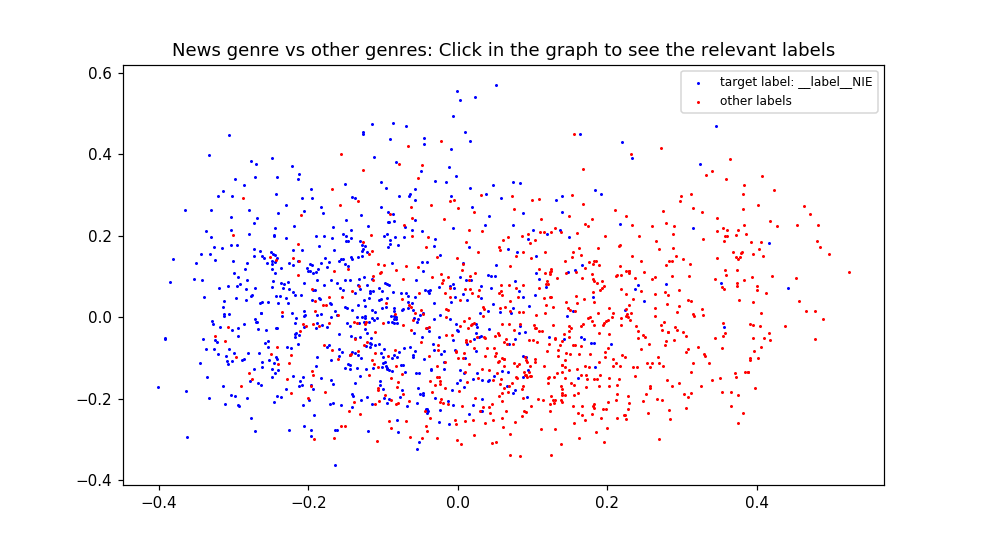

7

In [38]:
# draw graph of pca data: red: up to THRESHOLD messages; blue: more than THRESHOLD messages

%matplotlib notebook
import matplotlib.pyplot as plt
import random
import re

EXPERIMENT = "News genre vs other genres"
TARGETLABEL = "__label__NIE"
RANDOMFACTOR = 0.02
xTarget= []
yTarget = []
labelTarget = []
xOther = []
yOther = []
labelOther = []
random.seed()
for i in range(0,len(newSpace)):
    if labels[i] == TARGETLABEL:        
        xTarget.append(newSpace[i][0]+random.random()*RANDOMFACTOR)
        yTarget.append(newSpace[i][1]+random.random()*RANDOMFACTOR)
        labelTarget.append(labels[i])
    else:
        xOther.append(newSpace[i][0]+random.random()*RANDOMFACTOR)
        yOther.append(newSpace[i][1]+random.random()*RANDOMFACTOR)
        labelOther.append(labels[i])
fig = plt.figure(figsize=(9,5))
plt.gca().set_title(EXPERIMENT+": Click in the graph to see the relevant labels")
targetDots = plt.scatter(xTarget,yTarget,s=1,color="blue",picker=2,label="target label: {}".format(TARGETLABEL))
otherDots = plt.scatter(xOther,yOther,s=1,color="red",picker=2,label="other labels")
unknownDots = -1
plt.legend(fontsize=8)

def pickScatter(event):
    labels = []
    for i in range(0,len(event.ind)):
        if event.artist == otherDots: labels.append(labelOther[event.ind[i]])
        elif event.artist == targetDots: labels.append(labelTarget[event.ind[i]])
        elif event.artist == unknownDots: labels.append(fileNameUnknown[event.ind[i]])
        else: print("ERROR!"); fileName = "ERROR!"
    plt.gca().set_title(EXPERIMENT+": "+str(labels))
plt.gcf().canvas.mpl_connect("pick_event",pickScatter)


In [35]:
print(1)

1
